### importing the relevant packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Data loading and Preprocessing

In [2]:
raw_data = pd.read_csv('013 IndexE8.csv')
data = raw_data.copy()
data.date = pd.to_datetime(data.date, dayfirst = True)
data.set_index('date', inplace = True)
data = data.asfreq('b')
data = data.fillna(method = 'ffill')
data['market_value'] = data.dax

### The SARIMAX Model

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
model_sarimax = SARIMAX(data.market_value, exog = data.ftse, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -33889.442
Date:                           Sat, 03 Apr 2021   AIC                          67792.883
Time:                                   09:54:09   BIC                          67840.096
Sample:                               01-07-1994   HQIC                         67809.241
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse           1.1126      0.006    188.113      0.000       1.101       1.124
ar.L1          1.0000      0.000   2947.257

In [6]:
model_sarimax_2 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (1,1,1), seasonal_order = (2,0,1,5))
results_sarimax_2 = model_sarimax_2.fit()
print(results_sarimax_2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 5)   Log Likelihood               66477.258
Date:                           Sat, 03 Apr 2021   AIC                        -132936.515
Time:                                   10:01:32   BIC                        -132875.815
Sample:                               01-07-1994   HQIC                       -132915.483
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   1.73e-22  -7.23e+06      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.66e-21   6.04e+20

In [7]:
data['res_sarimax_2'] = results_sarimax_2.resid
data['res_sarimax'] = results_sarimax.resid

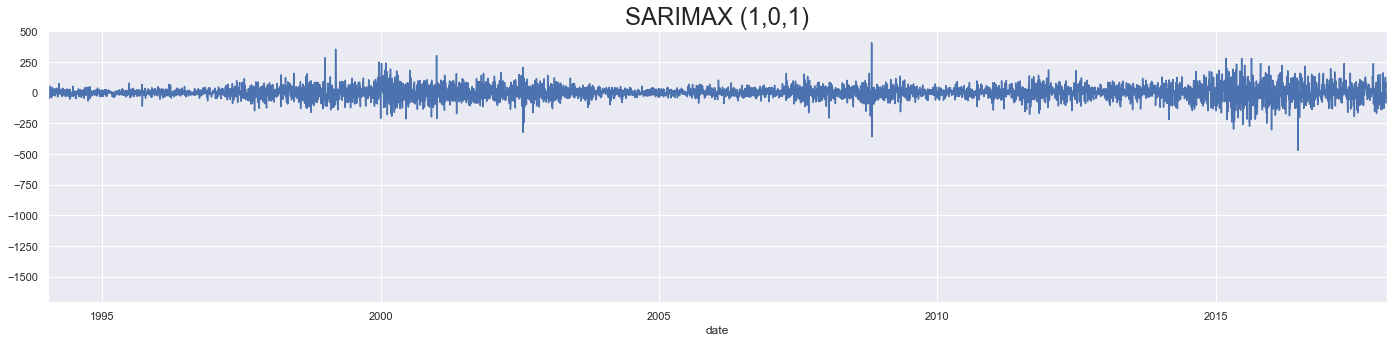

In [11]:
data['res_sarimax'].plot(figsize = (24, 5))
plt.title('SARIMAX (1,0,1)', size = 24)
plt.show()

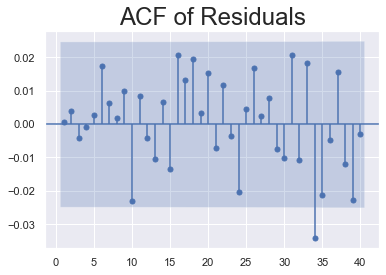

In [12]:
sgt.plot_acf(data['res_sarimax'], zero = False, lags = 40)
plt.title('ACF of Residuals', size = 24)
plt.show()

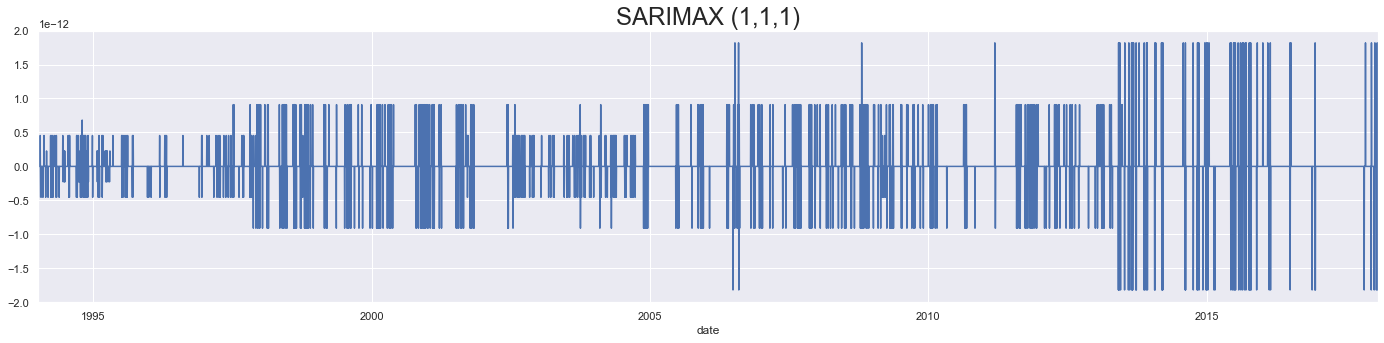

In [10]:
data['res_sarimax_2'].plot(figsize = (24, 5))
plt.title('SARIMAX (1,1,1)', size = 24)
plt.show()

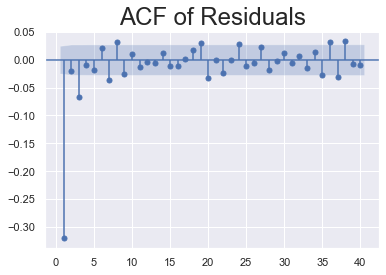

In [9]:
sgt.plot_acf(data['res_sarimax_2'], zero = False, lags = 40)
plt.title('ACF of Residuals', size = 24)
plt.show()

In [13]:
model_sarimax_3 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (3,1,3), seasonal_order = (2,0,1,5))
results_sarimax_3 = model_sarimax_3.fit()
print(results_sarimax_3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        market_value   No. Observations:                 6277
Model:             SARIMAX(3, 1, 3)x(2, 0, [1], 5)   Log Likelihood               66477.258
Date:                             Sat, 03 Apr 2021   AIC                        -132928.515
Time:                                     10:14:36   BIC                        -132840.837
Sample:                                 01-07-1994   HQIC                       -132898.136
                                      - 01-29-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   1.53e-22  -8.17e+06      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.6

In [14]:
model_sarimax_3_2 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (3,1,2), seasonal_order = (2,0,1,5))
results_sarimax_3_2 = model_sarimax_3_2.fit()
print(results_sarimax_3_2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        market_value   No. Observations:                 6277
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 5)   Log Likelihood               66477.258
Date:                             Sat, 03 Apr 2021   AIC                        -132930.515
Time:                                     10:16:42   BIC                        -132849.581
Sample:                                 01-07-1994   HQIC                       -132902.473
                                      - 01-29-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   1.54e-22  -8.09e+06      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.6

In [15]:
model_sarimax_3_1 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (3,1,1), seasonal_order = (2,0,1,5))
results_sarimax_3_1 = model_sarimax_3_1.fit()
print(results_sarimax_3_1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 6277
Model:             SARIMAX(3, 1, 1)x(2, 0, 1, 5)   Log Likelihood               66477.257
Date:                           Sat, 03 Apr 2021   AIC                        -132932.515
Time:                                   10:18:32   BIC                        -132858.325
Sample:                               01-07-1994   HQIC                       -132906.809
                                    - 01-29-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15      1e-22  -1.24e+07      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.56e-21   6.42e+20

In [16]:
model_sarimax_2_3 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (2,1,3), seasonal_order = (2,0,1,5))
results_sarimax_2_3 = model_sarimax_2_3.fit()
print(results_sarimax_2_3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        market_value   No. Observations:                 6277
Model:             SARIMAX(2, 1, 3)x(2, 0, [1], 5)   Log Likelihood               66477.257
Date:                             Sat, 03 Apr 2021   AIC                        -132930.514
Time:                                     10:20:45   BIC                        -132849.580
Sample:                                 01-07-1994   HQIC                       -132902.472
                                      - 01-29-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   1.59e-22  -7.86e+06      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.6

In [17]:
model_sarimax_1_3 = SARIMAX(data.market_value, exog = data[['ftse','dax','nikkei']], order = (1,1,3), seasonal_order = (2,0,1,5))
results_sarimax_1_3 = model_sarimax_1_3.fit()
print(results_sarimax_1_3.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        market_value   No. Observations:                 6277
Model:             SARIMAX(1, 1, 3)x(2, 0, [1], 5)   Log Likelihood               66477.257
Date:                             Sat, 03 Apr 2021   AIC                        -132932.514
Time:                                     10:21:34   BIC                        -132858.325
Sample:                                 01-07-1994   HQIC                       -132906.809
                                      - 01-29-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   9.68e-23  -1.29e+07      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.5

In [20]:
print('sarimax_1_3 \tLLR :', results_sarimax_1_3.llf, '\t AIC : ',results_sarimax_1_3.aic)
print('sarimax_2_3 \tLLR :', results_sarimax_2_3.llf, '\t AIC : ',results_sarimax_2_3.aic)
print('sarimax_3_3 \tLLR :', results_sarimax_3.llf, '\t AIC : ',results_sarimax_3.aic)
print('sarimax_3_2 \tLLR :', results_sarimax_3_2.llf, '\tAIC : ',results_sarimax_3_2.aic)
print('sarimax_3_1 \tLLR :', results_sarimax_3_1.llf, '\t AIC : ',results_sarimax_3_1.aic)
print('sarimax_1_1 \tLLR :', results_sarimax.llf, '\t AIC : ',results_sarimax.aic)
print('sarimax_1 \tLLR :', results_sarimax_2.llf, '\t AIC : ',results_sarimax_2.aic)

sarimax_1_3 	LLR : 66477.25718528041 	 AIC :  -132932.51437056082
sarimax_2_3 	LLR : 66477.25691296521 	 AIC :  -132930.51382593042
sarimax_3_3 	LLR : 66477.25754875108 	 AIC :  -132928.51509750215
sarimax_3_2 	LLR : 66477.2575902658 	AIC :  -132930.5151805316
sarimax_3_1 	LLR : 66477.25730771883 	 AIC :  -132932.51461543766
sarimax_1_1 	LLR : -33889.441551642216 	 AIC :  67792.88310328443
sarimax_1 	LLR : 66477.25751801772 	 AIC :  -132936.51503603545


In [19]:
print(results_sarimax_3_2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        market_value   No. Observations:                 6277
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 5)   Log Likelihood               66477.258
Date:                             Sat, 03 Apr 2021   AIC                        -132930.515
Time:                                     10:30:41   BIC                        -132849.581
Sample:                                 01-07-1994   HQIC                       -132902.473
                                      - 01-29-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ftse       -1.249e-15   1.54e-22  -8.09e+06      0.000   -1.25e-15   -1.25e-15
dax            1.0000   1.6